# Intro to Data Sciecne (71253) - Problem Set 1

## Instructions

Complete the tasks and answer each of the questions below using both text and code cells, as needed.    
Your code needs to be able to excute properly.   
Make sure to include complete answers. This can be done either using a text cell, or by formating and printing a string (using the 'format' and 'print' functions). See example below.  
  
Do **not** just dump the value of a variable onto the screen. 

### Example of desired output format

As an example, let's consider the question:  
> "How excited are you about data science from 1-10"  

and the (obvious) answer:

>10

The perfered answer formats is:

In [1]:
excitment = 10
print("My level of excitment about data science is {ex:0}!".format(ex=excitment))

My level of excitment about data science is 10!


  
  Altenrtively, you can hard-code the answer in a text cell:   

My level of excitment about data science is 10!

This format is advised only for answers that do not contain the outputs of any code since it is prone to errors - if the code/output changes, the hard-coded text does not.

### Example of unacceptable output format

An unacceptable format is dump the value of a variable onto the screen. For example:

In [2]:
excitment = 10
excitment

10

***

## 1. Imports and parsing

In [3]:
## Import the equired libraries for the pset here.
## It is a good habit to start with the imports you'll need in a separare code block.
import pandas as pd

In [4]:
## read the data from the file "okcupid_profiles_ps1.csv" into a pandas dataframe.
dfile = 'okcupid_profiles_ps1.csv'
data = pd.read_csv(dfile)

## drop the first column, since it is just a running index
data.drop(columns=data.columns[0], inplace=True) 

data.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (..."
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++"
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)"
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english


*** 

## 2. Overall data structure

### 2.1 How many records does the data contain?

In [5]:
print('There are {n} records'.format(n=data.shape[0]))

There are 10000 records


### 2.2 How many variables does the data contain?

In [6]:
print('There are {n} variables'.format(n=data.shape[1]))

There are 21 variables


### 2.3 What are the names of the first 5 variables?

In [7]:
data.columns[:5]
print('The names of the first 5 variables are: {0}, {1}, {2}, {3}, and {4}.'.format(*data.columns[:5]))

The names of the first 5 variables are: age, status, sex, orientation, and body_type.


***

## 3. Variable types

### 3.1 What are the types of the variables 'age', 'status', 'education', 'body_type', and 'drinks'?  
(e.g. Continous, Ordinal, etc')

- age: Discrete. In principle age can be continous, in partice it is report in discrete years here. 
- status: Nomial.
- education: Ordinal.
- body_type: Nominal
- drinks: Ordinal

### 3.2 Formulate 3 questions involving a single variable.  
(e.g. How many vegeterians are there in the data?)

What is the precentage of men in the data?  
What is the average height?  
How many different body_types are there in the data?  
What is the maximal number of languages reported in the data?

### 3.3 Formulate 3 questions involving a pair of variables.
(e.g. How many vegeterians men are there in the data?)

What is the averge height of men?  
Do men and women have the same income?  
Do people who smoke more tend to also drink more?  
Does diet affect body type?


***

## 4. Analyzing body types

### 4.1 How many different values of the variable "body_type" are there?

In [8]:
btypes = data.body_type.unique()
print('There are {n} different body types'.format(n=btypes.shape[0]))

There are 13 different body types


As we said, it's alway good to inspect things "by hand". So let's print out the different body types:

In [9]:
for btype in btypes:
    print('{}'.format(btype))

a little extra
average
thin
athletic
fit
nan
skinny
curvy
full figured
jacked
rather not say
used up
overweight


We can now see that there are two values that aren't really specific body types: "nan" and "rather not say".  
Should we even count them as body types?  
if we do, should we count them as seperate body types? or as a single thing that means "unspecified"?

### 4.2 What percentage of people report that they have an "average", "fit", or "athletic" body type?  
(sum all theree types)

In [10]:
btypes_fracs = data.body_type.value_counts(normalize=True)
types = ["average", "fit", "athletic"]
f = btypes_fracs[types].sum()
print('({f:.1%}) people report they have an average, fit, or athletic body type'.format(f=f))

(71.5%) people report they have an average, fit, or athletic body type


Note that `value_counts` doesn't count `nan` values. So the fraction I got is out of the people who entred something in that field, even if it was "rather not say".

### (Bonus) How do you interpret the results of the previous question?  
(regarding body type percentages)

This percentage seems to be higher than the precentage in the general population.  
  
This could be due to the fact that the OKCupid users are not a random sampling of the general population. For example, users may be younger than the overall populations, or people with these body types may be more likely to use the app.  
  
Alternatively, users may not reprt their body types accurately.  
  
These explanations are not mutually exclusive. It is likely that both are at play.

***

## 5. Analyzing heights

### 5.1 Heights are reported in inches. Create a new column in your dataframe containing the heights in cm.  
(1 inche = 2.54cm)

In [11]:
data['height_cm'] = data.height*2.54

### 5.2 What are the maximal and minimal heights in the data?  
(in cm)

In [12]:
h_max = data.height_cm.max()
h_min = data.height_cm.min()
print('The maximal hieght is {0:.1f}cm and the minimal one is {1:.1f}cm.'.format(h_max, h_min))

The maximal hieght is 241.3cm and the minimal one is 91.4cm.


### How do you interpret the results of the previous question?  
(regarding maximal and minimal height)

These extreme heights are very rare.   
Since they are much rarer than 1 in 10,000 (the size of our dataset), it is likely that these are not faithful data.

In [21]:
import seaborn as sns
sns.set(style='ticks', font_scale=2, rc={"lines.linewidth": 3})

In [65]:
data.height_cm.describe()

count    10000.000000
mean       173.561248
std          9.927545
min         91.440000
25%        167.640000
50%        172.720000
75%        180.340000
max        241.300000
Name: height_cm, dtype: float64

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

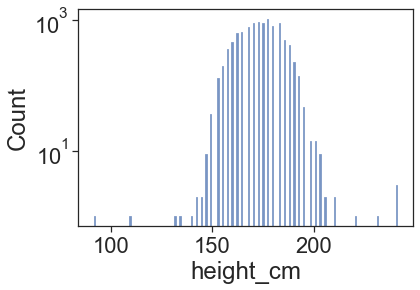

In [71]:
sns.histplot(data=data, x='height_cm', log_scale=(False,True))

In [74]:
data.query("height_cm==@h_max")

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,height_cm
2569,26,single,m,straight,NaN,strictly other,NaN,NaN,graduated from college/university,native american,...,NaN,2012-06-29-13-41,"san francisco, california",NaN,NaN,NaN,taurus,NaN,english,241.3
3016,30,single,m,straight,fit,NaN,socially,never,graduated from law school,white,...,law / legal services,2012-04-23-23-36,"san francisco, california",NaN,NaN,NaN,aquarius but it doesn&rsquo;t matter,no,english (fluently),241.3
8089,55,single,m,straight,rather not say,NaN,desperately,often,dropped out of high school,"asian, middle eastern, black, native american,...",...,unemployed,2012-04-19-07-50,"berkeley, california","has a kid, but doesn't want more",dislikes dogs and dislikes cats,other and very serious about it,sagittarius but it doesn&rsquo;t matter,when drinking,english,241.3


### 5.3 How many men shorter than 170cm are there in the data? How many women?

In [13]:
h = 170
m = ((data['height_cm']<h) & (data['sex']=='m')).sum()
w = ((data['height_cm']<h) & (data['sex']=='f')).sum()
print('There are {m} men and {w} women under {h}cm.'.format(m=m, w=w, h=h))

There are 479 men and 2754 women under 170cm.


In [14]:
## Alternative solution using groupby
n = data[data['height_cm']<h].groupby('sex').size()
print('There are {m} men and {w} women under {h}cm.'.format(m=n.m, w=n.f, h=h))

There are 479 men and 2754 women under 170cm.


In [15]:
## Alternative solution using query
m = data.query("sex=='m' and height_cm<@h").shape[0]
w = data.query("sex=='f' and height_cm<@h").shape[0]
print('There are {m} men and {w} women under {h}cm.'.format(m=m, w=w, h=h))

There are 479 men and 2754 women under 170cm.


In [16]:
##  Alternative solution using both query and groupby
n = data.query("height_cm<@h").groupby('sex').size()
print('There are {m} men and {w} women under {h}cm.'.format(m=n.m, w=n.f, h=h))

There are 479 men and 2754 women under 170cm.


### How do you interpret the results of the previous question?  
(regarding people under 170cm)

It's tempting to conclude that women tend to be shorter than men.   
But since the overall number of men and women in the data is not the same, we need to look at the percentage, rather than absolute number of men and women < 170cm.  
It turns out that there are  more men than women in the data, making the precentage even more skewed: 0.4% of men and 17.4% of women are < 170cm. (see below)  
  
  
As in the question regaridng body type, it is possible that these data are not representative of the general population, or that people do not reprt these data truthfully. 


In [17]:
n_short = data[data['height_cm']<h].groupby('sex').size()
n_all = data.groupby('sex').size()
f = n/n_all
print('There are {m:.1%} men and {w:.1%} women under {h}cm.'.format(m=f.m, w=f.f, h=h))

There are 8.1% men and 67.9% women under 170cm.


Text(0.5, 1.0, '# of records with height < 170cm')

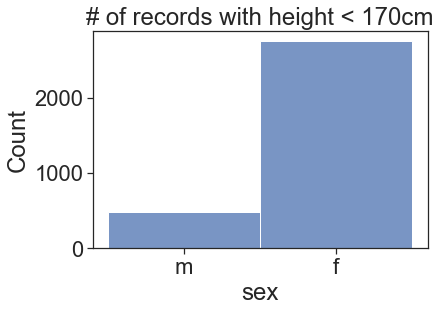

In [53]:
ax = sns.histplot(data=data.query("height_cm<@h"), x='sex')
ax.set_title('# of records with height < 170cm')

Text(0.5, 1.0, 'Total # of records')

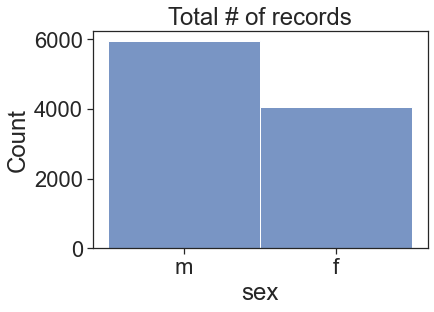

In [64]:
ax = sns.histplot(data=data, x='sex')
ax.set_title('Total # of records')

Text(0, 0.5, 'percent')

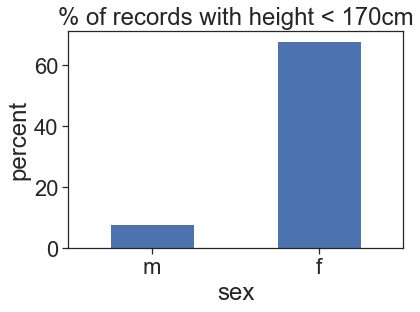

In [63]:
ax = (f.iloc[::-1]*100).plot(kind='bar', rot=0)
ax.set_title('% of records with height < 170cm')
ax.set_ylabel('percent')